In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [3]:
dt=pd.read_excel('Data_Test.xlsx')
dt.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [4]:
df.shape,dt.shape

((7628, 2), (2748, 1))

In [5]:
df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [6]:
df['STORY'][1]

'How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?'

In [7]:
#removing numbers and other special characters
def noise_removal(text):
    return re.sub('[^A-Za-z]+',' ',text)
df['STORY']=df['STORY'].apply(noise_removal)
dt['STORY']=dt['STORY'].apply(noise_removal)

In [8]:
#converting all of the texts to lower case
def lower_case(text):
    return text.lower()
df['STORY']=df['STORY'].apply(lower_case)
dt['STORY']=dt['STORY'].apply(lower_case)
print(df)

                                                  STORY  SECTION
0     but the most painful was the huge reversal in ...        3
1     how formidable is the opposition alliance amon...        0
2     most asian currencies were trading lower today...        3
3     if you want to answer any question click on an...        1
4     in global markets gold prices edged up today a...        3
...                                                 ...      ...
7623  karnataka has been a congress bastion but it a...        0
7624  the film which also features janhvi kapoor wil...        2
7625  the database has been created after bringing t...        1
7626  the state which has had an uneasy relationship...        0
7627  virus stars kunchacko boban tovino thomas indr...        2

[7628 rows x 2 columns]


In [9]:
#tokenizing each news into list of words
def tokenizing(tokens):
    return word_tokenize(tokens)
df['STORY']=df['STORY'].apply(tokenizing)
dt['STORY']=dt['STORY'].apply(tokenizing)
print(df)

                                                  STORY  SECTION
0     [but, the, most, painful, was, the, huge, reve...        3
1     [how, formidable, is, the, opposition, allianc...        0
2     [most, asian, currencies, were, trading, lower...        3
3     [if, you, want, to, answer, any, question, cli...        1
4     [in, global, markets, gold, prices, edged, up,...        3
...                                                 ...      ...
7623  [karnataka, has, been, a, congress, bastion, b...        0
7624  [the, film, which, also, features, janhvi, kap...        2
7625  [the, database, has, been, created, after, bri...        1
7626  [the, state, which, has, had, an, uneasy, rela...        0
7627  [virus, stars, kunchacko, boban, tovino, thoma...        2

[7628 rows x 2 columns]


In [10]:
#removing single-lettered words
def single_letter(text):
    for i in text:
        if len(i)==1:
            text.remove(i)
    return text
df['STORY']=df['STORY'].apply(single_letter)
dt['STORY']=dt['STORY'].apply(single_letter)
print(df['STORY'])

0       [but, the, most, painful, was, the, huge, reve...
1       [how, formidable, is, the, opposition, allianc...
2       [most, asian, currencies, were, trading, lower...
3       [if, you, want, to, answer, any, question, cli...
4       [in, global, markets, gold, prices, edged, up,...
                              ...                        
7623    [karnataka, has, been, congress, bastion, but,...
7624    [the, film, which, also, features, janhvi, kap...
7625    [the, database, has, been, created, after, bri...
7626    [the, state, which, has, had, an, uneasy, rela...
7627    [virus, stars, kunchacko, boban, tovino, thoma...
Name: STORY, Length: 7628, dtype: object


In [11]:
def convert_to_string(text):
    return ' '.join(text)
df['STORY']=df['STORY'].apply(convert_to_string)
dt['STORY']=dt['STORY'].apply(convert_to_string)
print(df['STORY'])

0       but the most painful was the huge reversal in ...
1       how formidable is the opposition alliance amon...
2       most asian currencies were trading lower today...
3       if you want to answer any question click on an...
4       in global markets gold prices edged up today a...
                              ...                        
7623    karnataka has been congress bastion but it als...
7624    the film which also features janhvi kapoor wil...
7625    the database has been created after bringing t...
7626    the state which has had an uneasy relationship...
7627    virus stars kunchacko boban tovino thomas indr...
Name: STORY, Length: 7628, dtype: object


In [12]:
#removing english stop-words
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in ENGLISH_STOP_WORDS])
    return no_stp_words
df['STORY']=df['STORY'].apply(stopword_remover)
dt['STORY']=dt['STORY'].apply(stopword_remover)

In [13]:
#lemmetizing words of each sentence
from nltk.stem import WordNetLemmatizer
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text)
df['STORY']=df['STORY'].apply(lemmatizer)
dt['STORY']=dt['STORY'].apply(lemmatizer)


In [14]:
#inspecting preprocessed data
df['STORY'][0]

'painful huge reversal fee income unheard private sector lenders essentially means yes bank took granted fees structured loan deals paid accounted upfront books borrowers turned defaulters fees tied loan deals fell cracks gill vowed shift safer accounting practice amortizing fee income booking upfront gill mend past ways means nasty surprises future good news considering investors love clean image loathe uncertainties gain pain promise strong stable balance sheet comes sacrifices investors hopes phenomenal growth promise kapoor'

In [15]:
dt['STORY'][0]

'gadgets like gaming smartphones wearable medical devices lifting user experience new level mint india wire consumer technologyconsumer technology trends new yeartech gadgetsfoldable phonesgaming smartphoneswearable medical devicestechnology new delhi gadgets integral lives relying form factor communicate commute work informed entertained year gadgets lifting user experience new level expect smartphones foldable screens foldable phones finally moving concept stage commercial launches organic light emitting diode oled panels higher plastic substrates allowing bent damage based display maker royole corp foldable phone flexpai arrived select markets samsung unnamed foldable phone expected year samsung smartphone chief executive officer j koh said make million units lg expected display foldable phone year apple nokia lenovo huawei working foldable phones reportedly esim soon smartphone won need physical sim card anymore esim technology used apple iphones apple watch replaces physical sim v

In [16]:
x=df.copy(deep=True)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating a bag-of-words dictionary of words from the data
bow_dictionary = CountVectorizer().fit(x['STORY'])

#Total number of words in the bow_dictionary
len(bow_dictionary.vocabulary_)

30678

In [18]:
bow = bow_dictionary.transform(x['STORY'])

In [19]:
bow.shape

(7628, 30678)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

#Fitting the bag of words data to the TF-IDF transformer
tfidf_transformer = TfidfTransformer().fit(bow)

#Transforming the bag of words model to TF-IDF vectors
x = tfidf_transformer.transform(bow)

In [21]:
y=df['SECTION']
x.shape

(7628, 30678)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [23]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=KNeighborsClassifier()
clf5=MultinomialNB()

In [24]:
from sklearn.model_selection import cross_val_score
mod=[clf1,clf2,clf3,clf4,clf5]
mod_name=['LogR','DT','RF','KNN','MultinomialNB']
for  i ,j in zip(mod,mod_name):
    score=cross_val_score(i,x,y,cv=5)
    avg_score=np.mean(score)
    var_score=np.std(score)/np.mean(score)*100
    print(j,'Avg Score:',avg_score, ' Variance error: ',var_score)

LogR Avg Score: 0.9648661237994972  Variance error:  0.23395572111595372
DT Avg Score: 0.871133274606278  Variance error:  1.1568747247899385
RF Avg Score: 0.9503152783447565  Variance error:  0.32359624345412363
KNN Avg Score: 0.9483484089981307  Variance error:  0.615430290602856
MultinomialNB Avg Score: 0.9478245063704531  Variance error:  0.4633600933509256


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=123,stratify=y)
log_reg=LogisticRegression().fit(x_train,y_train)
y_predict=log_reg.predict(x_test)
print('accuracy score:',accuracy_score(y_predict,y_test))

accuracy score: 0.9702927042376583


<AxesSubplot:>

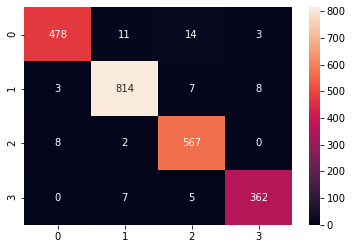

In [28]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d')

In [218]:
from sklearn.pipeline import Pipeline
#Initializing the pipeline with necessary transformations and the required classifier
pipe = Pipeline([
('bow', CountVectorizer()),
('tfidf', TfidfTransformer()),
('classifier', LogisticRegression())])

In [219]:
pipe.fit(df['STORY'],df['SECTION'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [220]:
prediction=pipe.predict(dt['STORY'])

In [221]:
pd.DataFrame(prediction, columns = ['SECTION']).value_counts()

SECTION
1          1194
2           844
0           410
3           300
dtype: int64